In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
Traindf=pd.read_csv('Train.csv')

In [3]:
Traindf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
Traindf.shape

(8523, 12)

In [5]:
Traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [6]:
Testdf=pd.read_csv('Test.csv')

In [7]:
Testdf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [8]:
Testdf.shape

(5681, 11)

In [9]:
Traindf['source']='train'
Testdf['source']='test'
Testdf['Item_Outlet_Sales']=0

In [10]:
df=pd.concat([Traindf,Testdf])

In [11]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [12]:
df.shape

(14204, 13)

In [13]:
df.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'source'],
      dtype='object')

In [14]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['Outlet_Establishment_Year'], dtype='object'),
 dtype('float64'): Index(['Item_MRP', 'Item_Outlet_Sales', 'Item_Visibility', 'Item_Weight'], dtype='object'),
 dtype('O'): Index(['Item_Fat_Content', 'Item_Identifier', 'Item_Type', 'Outlet_Identifier',
        'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'source'],
       dtype='object')}

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            14204 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.5+ MB


In [16]:
df.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales               0
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [17]:
df.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,14204.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,1308.865489,0.065953,12.792854,1997.830681
std,62.086938,1699.791423,0.051459,4.652502,8.371664
min,31.290000,0.000000,0.000000,4.555000,1985.000000
25%,94.012000,0.000000,0.027036,8.710000,1987.000000
50%,142.247000,559.272000,0.054021,12.600000,1999.000000
75%,185.855600,2163.184200,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


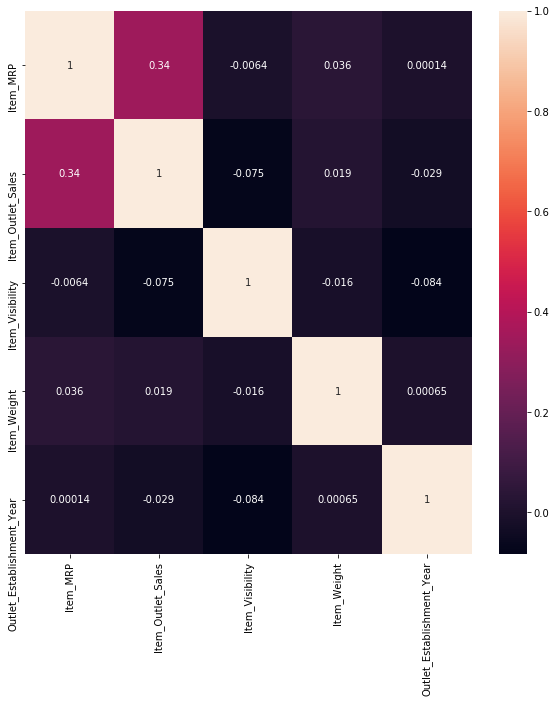

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [19]:
df_int=df.select_dtypes(include=[np.number])
df_int.head(2)

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
0,249.8092,3735.1380,0.016047,9.30,1999
1,48.2692,443.4228,0.019278,5.92,2009


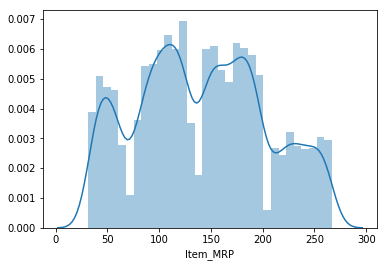

In [20]:
sns.distplot(df_int['Item_MRP'])

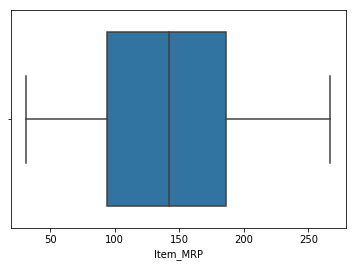

In [21]:
sns.boxplot(df_int['Item_MRP'])

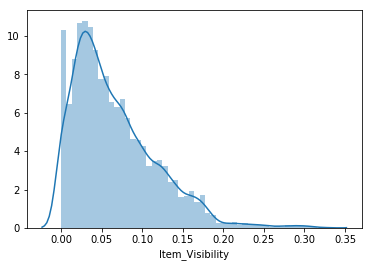

In [22]:
sns.distplot(df_int['Item_Visibility'])

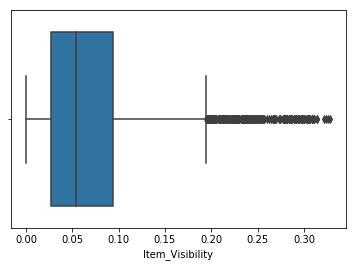

In [23]:
sns.boxplot(df_int['Item_Visibility'])

In [24]:
df['Item_Visibility'].describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [25]:
from scipy.stats import boxcox
df['Item_Visibility']=df['Item_Visibility']+1
df['Item_Visibility']=boxcox(df['Item_Visibility'],0)

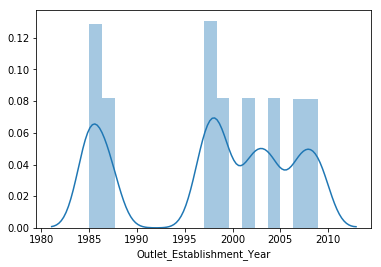

In [26]:
sns.distplot(df['Outlet_Establishment_Year'])

In [27]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [28]:
df['Outlet_Establishment_Year'].describe()

count    14204.000000
mean      1997.830681
std          8.371664
min       1985.000000
25%       1987.000000
50%       1999.000000
75%       2004.000000
max       2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [29]:
df['Outlet_Establishment_Year']=2009-df['Outlet_Establishment_Year']

In [30]:
df['Item_Weight'].isnull().sum()

2439

In [31]:
df['Item_Weight'].fillna((df['Item_Weight'].mean()),inplace=True)

In [32]:
df_object=df.select_dtypes(include=[np.object])
df_object.head()

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,Dairy,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,Soft Drinks,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,Meat,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,Fruits and Vegetables,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,Household,OUT013,Tier 3,High,Supermarket Type1,train


In [33]:
for i in df_object:
    print(i)
    print(df_object[i].value_counts(),'\n')

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64 

Item_Identifier
DRI03    10
FDO11    10
FDS40    10
FDL14    10
FDR16    10
FDJ41    10
FDZ36    10
FDD51    10
NCG43    10
FDK56    10
FDF08    10
FDA50    10
FDC50    10
FDI53    10
FDU31    10
FDG33    10
FDK38    10
DRE13    10
FDQ11    10
NCM43    10
FDX48    10
FDG10    10
FDP10    10
FDO36    10
FDR02    10
FDE45    10
FDE21    10
FDB35    10
FDR31    10
FDT25    10
         ..
FDA45     8
FDY11     8
FDI09     8
FDS35     8
FDH50     8
NCG19     8
NCY05     8
FDO22     8
FDJ46     8
FDR60     8
NCW17     8
DRC13     8
DRJ37     8
FDY50     8
DRB01     8
FDL08     8
FDQ55     8
NCL42     7
FDM50     7
FDO33     7
FDH58     7
FDM52     7
FDM10     7
FDR51     7
FDX49     7
FDL50     7
DRN11     7
FDS22     7
FDI46     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64 

Item_Type
Fruits and Vegetables    2013
Snack Foods             

In [34]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode().iloc[0],inplace=True)

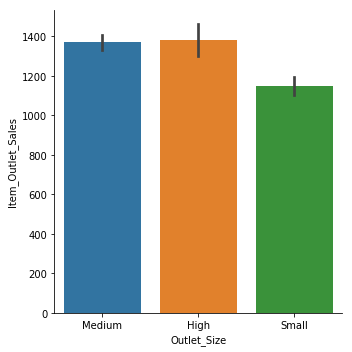

In [35]:
sns.catplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df,kind='bar')

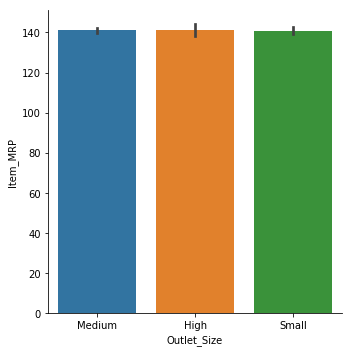

In [36]:
sns.catplot(x='Outlet_Size',y='Item_MRP',data=df,kind='bar')

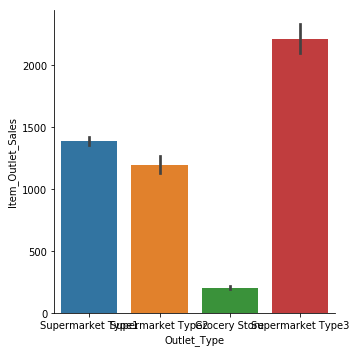

In [37]:
sns.catplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df,kind='bar')

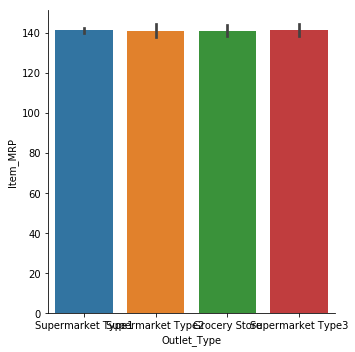

In [38]:
sns.catplot(x='Outlet_Type',y='Item_MRP',data=df,kind='bar')

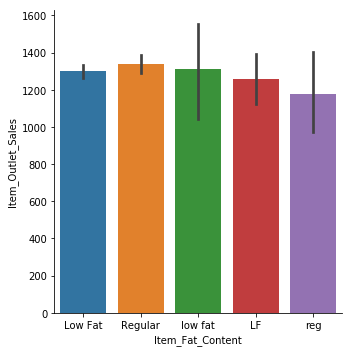

In [39]:
sns.catplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df,kind='bar')

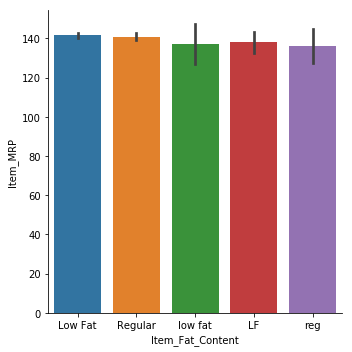

In [40]:
sns.catplot(x='Item_Fat_Content',y='Item_MRP',data=df,kind='bar')

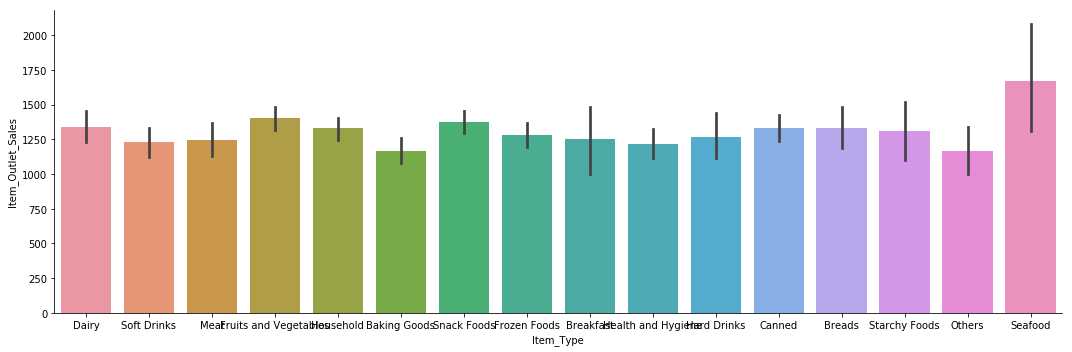

In [41]:
sns.catplot(x='Item_Type',y='Item_Outlet_Sales',data=df,kind='bar',height=5,aspect=3)

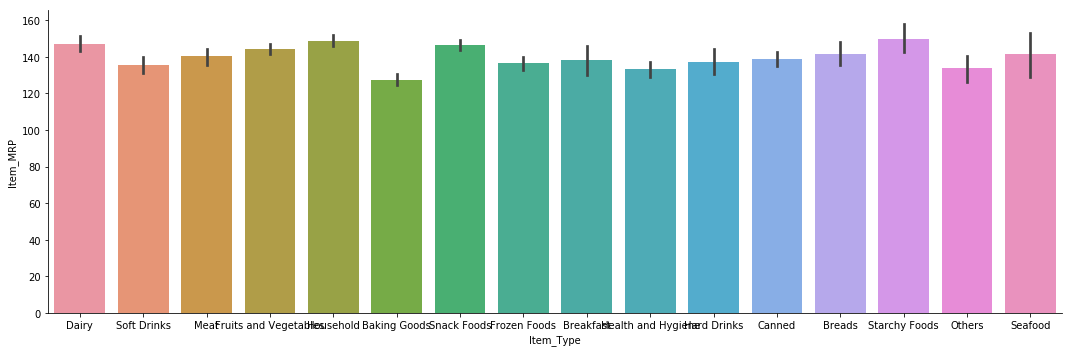

In [42]:
sns.catplot(x='Item_Type',y='Item_MRP',data=df,kind='bar',height=5,aspect=3)

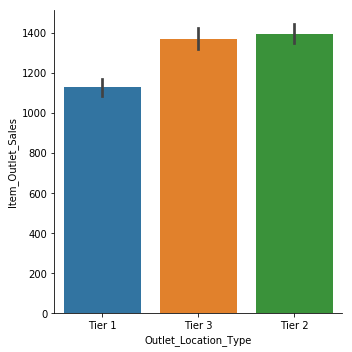

In [43]:
sns.catplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df,kind='bar')

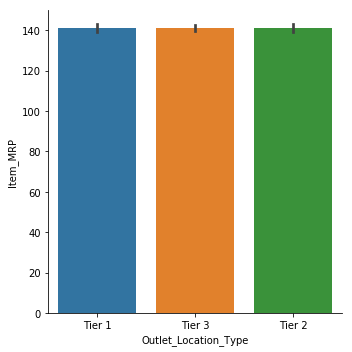

In [44]:
sns.catplot(x='Outlet_Location_Type',y='Item_MRP',data=df,kind='bar')

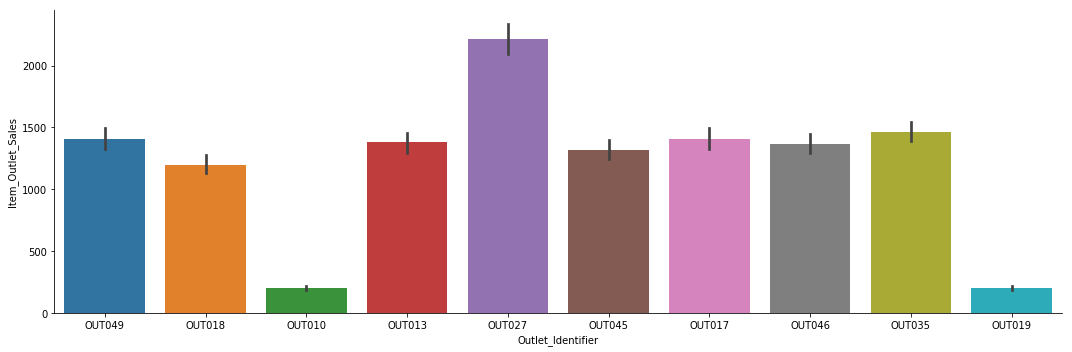

In [45]:
sns.catplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=df,kind='bar',height=5,aspect=3)

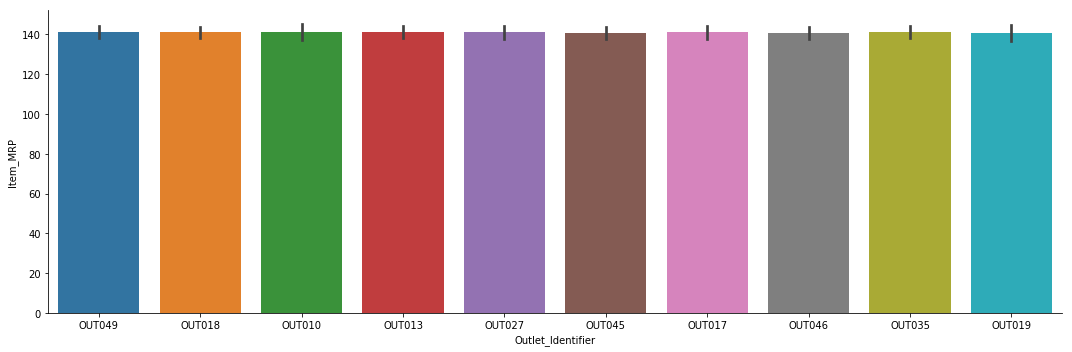

In [46]:
sns.catplot(x='Outlet_Identifier',y='Item_MRP',data=df,kind='bar',height=5,aspect=3)

In [47]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.015920,9.30,10,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019095,5.92,0,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016621,17.50,10,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,11,OUT010,Tier 3,Medium,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,22,OUT013,Tier 3,High,Supermarket Type1,train


In [48]:
df.isnull().sum()

Item_Fat_Content             0
Item_Identifier              0
Item_MRP                     0
Item_Outlet_Sales            0
Item_Type                    0
Item_Visibility              0
Item_Weight                  0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Type                  0
source                       0
dtype: int64

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [50]:
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])

In [51]:
df['Outlet_Size']=le.fit_transform(df['Outlet_Size'])

In [52]:
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])

In [53]:
df['Outlet_Identifier']=le.fit_transform(df['Outlet_Identifier'])

In [54]:
df['Item_Type']=le.fit_transform(df['Item_Type'])

In [55]:
df['Item_Identifier']=le.fit_transform(df['Item_Identifier'])

In [56]:
df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])

In [57]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,1,156,249.8092,3735.1380,4,0.015920,9.30,10,9,0,1,1,train
1,2,8,48.2692,443.4228,14,0.019095,5.92,0,3,2,1,2,train
2,1,662,141.6180,2097.2700,10,0.016621,17.50,10,9,0,1,1,train
3,2,1121,182.0950,732.3800,6,0.000000,19.20,11,0,2,1,0,train
4,1,1297,53.8614,994.7052,9,0.000000,8.93,22,1,2,0,1,train


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null int32
Item_Identifier              14204 non-null int32
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            14204 non-null float64
Item_Type                    14204 non-null int32
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null int32
Outlet_Location_Type         14204 non-null int32
Outlet_Size                  14204 non-null int32
Outlet_Type                  14204 non-null int32
source                       14204 non-null object
dtypes: float64(4), int32(7), int64(1), object(1)
memory usage: 1.5+ MB


In [59]:
TrainFinal=df.loc[df['source']=='train']
TrainFinal.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,1,156,249.8092,3735.1380,4,0.015920,9.30,10,9,0,1,1,train
1,2,8,48.2692,443.4228,14,0.019095,5.92,0,3,2,1,2,train
2,1,662,141.6180,2097.2700,10,0.016621,17.50,10,9,0,1,1,train
3,2,1121,182.0950,732.3800,6,0.000000,19.20,11,0,2,1,0,train
4,1,1297,53.8614,994.7052,9,0.000000,8.93,22,1,2,0,1,train


In [60]:
TrainFinal.drop(['source'],axis=1,inplace=True)

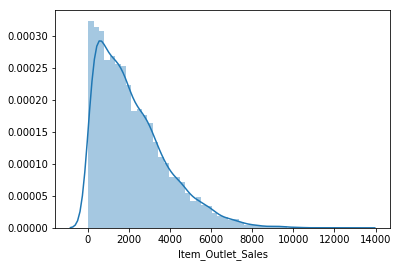

In [61]:
sns.distplot(TrainFinal['Item_Outlet_Sales'])

In [62]:
TrainFinal['Item_Outlet_Sales']=boxcox(TrainFinal['Item_Outlet_Sales'],0.5)

In [63]:
TrainFinal.shape

(8523, 12)

In [64]:
TestFinal=df.loc[df['source']=='test']
TestFinal.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,1,1114,107.8622,0.0,13,0.007536,20.750000,10,9,0,1,1,test
1,4,1078,87.3198,0.0,4,0.037708,8.300000,2,2,1,1,1,test
2,1,1420,241.7538,0.0,11,0.094924,14.600000,11,0,2,1,0,test
3,1,817,155.0340,0.0,13,0.015271,7.315000,2,2,1,1,1,test
4,2,1197,234.2300,0.0,4,0.112077,12.792854,24,5,2,1,3,test


In [65]:
TestFinal.drop(['source'],axis=1,inplace=True)
TestFinal.drop(['Item_Outlet_Sales'],axis=1,inplace=True)

In [66]:
TestFinal.shape

(5681, 11)

In [67]:
x=TrainFinal.drop(['Item_Outlet_Sales'],axis=1)
x.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,1,156,249.8092,4,0.015920,9.30,10,9,0,1,1
1,2,8,48.2692,14,0.019095,5.92,0,3,2,1,2
2,1,662,141.6180,10,0.016621,17.50,10,9,0,1,1
3,2,1121,182.0950,6,0.000000,19.20,11,0,2,1,0
4,1,1297,53.8614,9,0.000000,8.93,22,1,2,0,1


In [68]:
x.shape

(8523, 11)

In [69]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [70]:
y=TrainFinal['Item_Outlet_Sales']
y.head()

0    120.231551
1     40.115213
2     89.591921
3     52.125040
4     61.077895
Name: Item_Outlet_Sales, dtype: float64

In [71]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=63)

In [72]:
print(x_train.shape,x_test.shape)

(6818, 11) (1705, 11)


In [73]:
print(y_train.shape,y_test.shape)

(6818,) (1705,)


In [74]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [75]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
KNR=KNeighborsRegressor()
DTR=DecisionTreeRegressor(random_state=63)
ABR=AdaBoostRegressor(random_state=63)
RFR=RandomForestRegressor(random_state=63)
GBR=GradientBoostingRegressor(random_state=63)
XGR=XGBRegressor(random_state=63)

In [76]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('XGBRegressor',XGR))

In [77]:
from sklearn.metrics import r2_score,mean_squared_error

In [78]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,3))
    score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(round(score,3))
    print('\n')

********************************* LinearRegression *********************************

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
R2_score =  0.6006018052959137
Mean_Squared_Error = 535.0071399896173
Cross_Val_Score =  0.5690828049228348


********************************* Lasso *********************************

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  0.5886256698266152
Mean_Squared_Error = 551.0495710033696
Cross_Val_Score =  0.560649008983349


********************************* Ridge *********************************

 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
R2_score =  0.6005937936970376
Mean_Squared_Error = 535.0178717922599
Cross_Val_Score =  0.5690833252324748


**********************

In [79]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.600602,535.007,0.569
1,Lasso,0.588626,551.050,0.561
2,Ridge,0.600594,535.018,0.569
3,ElasticNet,0.516077,648.232,0.495
4,DecisionTreeRegressor,0.313646,919.394,0.326
5,KNeighborsRegressor,0.608160,524.883,0.594
6,AdaBoostRegressor,0.663306,451.013,0.647
7,RandomForestRegressor,0.626177,500.748,0.606
8,GradientBoostingRegressor,0.687070,419.179,0.671
9,XGBRegressor,0.687002,419.272,0.672


**I choose XGBRegressor as my final model because it perform very well on our dataset**

R2_score = 0.687002

Mean_Squared_Error = 419.008

Cross_val_score = 0.672

In [80]:
from sklearn.externals import joblib
joblib.dump(XGR,'Model_BigMart.csv')

['Model_BigMart.csv']

In [81]:
model=joblib.load('Model_BigMart.csv')

[16:03:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
